- ver0.0 2025/10/27 シェブロンパターン測定まで準備 (小川)

<span style="color: red; ">**examples/1Q-calibrationのフォルダをご自身のworkspaceに移動させてから, 実験を行ってください.**</span>

## クラウド設定

一度だけ実行すれば良い.

In [ ]:
# from pathlib import Path

# config = """[default]
# url=https://api.qiqb-cloud.jp
# api_token=xxxxxxx
# """
# Path("~/.oqtopus").expanduser().write_text(config)
# print("Configuration saved.")

Configuration saved.


QIQBクラウドのリンク：https://www.qiqb-cloud.jp/  
  
「ジョブ」のタブで, 実行済み・実行中のジョブを確認することができる. 

## 1qubitの較正 

In [1]:
from quri_parts_oqtopus.backend import OqtopusSseBackend
from oqtopus_sse_pulse.adapter import QuriAdapter, collect_payloads_from_job, collect_session_from_job
from oqtopus_sse_pulse.plotters import plot_payload

DEVICE = "anemone" # デバイス名 (勉強会ではanemoneに固定)
backend = OqtopusSseBackend() # OqtopusSseBackendのインスタンスを作成

### シェブロンパターン測定

- `1Q-calib-1_chevron_pattern.py`内を確認し, <span style="color: red; ">**各測定パラメータを適切に設定してから**</span>, 以下を実行する. 

job_id = 068ff27e-1e59-7e1e-8000-9237e30971f6
job_status = succeeded  elapsed=43.47


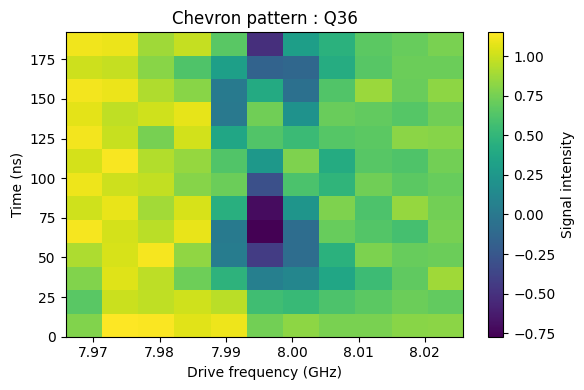

In [3]:
# 実験プログラムの指定
PROGRAM = "1Q-calib-1_chevron_pattern"

# ジョブの実行
job = backend.run_sse(
    file_path=f"{PROGRAM}.py",
    device_id=f"{DEVICE}-pulse",
    name=PROGRAM,
)
print(f"job_id = {job.job_id}")

# ジョブの完了待ち
job.wait_for_completion()
print(f"job_status = {job.status}  elapsed={job.execution_time}")

# QuriAdapterの作成
adapter = QuriAdapter(backend)

# 測定結果の取得
payloads = collect_payloads_from_job(
    backend=adapter,
    job_id=job.job_id,
)

# グラフ描画
p = payloads[0]
fig, ax = plot_payload(p, program=PROGRAM)

- 得られたシェブロンパターンから, このqubitの共鳴周波数を求めたい. 各駆動周波数におけるラビ振動をフーリエ変換して各ラビ周波数を計算し, それらのデータ点にフィッティングを行うことにより, ラビ振動が最小となる駆動周波数を算出する (<span style="color: red; ">**自主作業**</span>). 
- フィッティング関数は以下の通り:
$$ f_{\rm rabi} = \sqrt{(f_{\rm q} - f_{\rm d})^2 + f_{\rm rabi,min}^2} $$
- ここで$f_{\rm rabi}$は各駆動周波数におけるラビ振動周波数, $f_{\rm q}$はqubitの共鳴周波数, $f_{\rm d}$はマイクロ波駆動周波数, $f_{\rm rabi,min}$は共鳴駆動条件で現れる最小ラビ振動周波数である. $f_{\rm d}$は掃引パラメータ, $f_{\rm q}$, $f_{\rm rabi,min}$はフィッティングによって決定されるパラメータである.
- [補足]
  - マイクロ波駆動振幅を大きくすると, それに比例してラビ振動周波数が大きくなるが, それだけでなく, 上記フィッティングで得られるqubit共鳴周波数にも微小なシフトが観測されるはずである. これはac-シュタルク効果と呼ばれる現象で, 一般にマイクロ波駆動中のqubitは駆動の影響を受けてその共鳴周波数が微小にシフトする. ゲート忠実度を突き詰める場合には, DRAGなどのテクニックによってこのシフトの影響を考慮したパルス設計を行う必要がある. 
  - シェブロンパターンを細かく測定すると, qubitの共鳴とは別に細い共鳴信号が見えることがある. これは多くの場合, トランズモン中または近くの不純物によって生じる不要2準位系(two-level system: TLS)の共鳴が見えているものだと考えられる. TLSの共鳴周波数がqubitの共鳴周波数に近かったり, qubitとの結合が大きかったりすると, qubitのコヒーレンス性能の悪化をもたらす. さらにTLSは数時間〜数日の時間スケールで特性が変化することがあり, これがqubitの時間安定性にも影響を与える. 

### π/2パルス較正 (TBD)

### コヒーレンス測定 (TBD)

#### T1測定 (TBD)

#### T2 echo測定 (TBD)

#### Ramsey干渉実験 (TBD)

### 読み出し分類機調整 (TBD)

### Randomized Benchmarking (TBD)